In [ ]:
# visualization

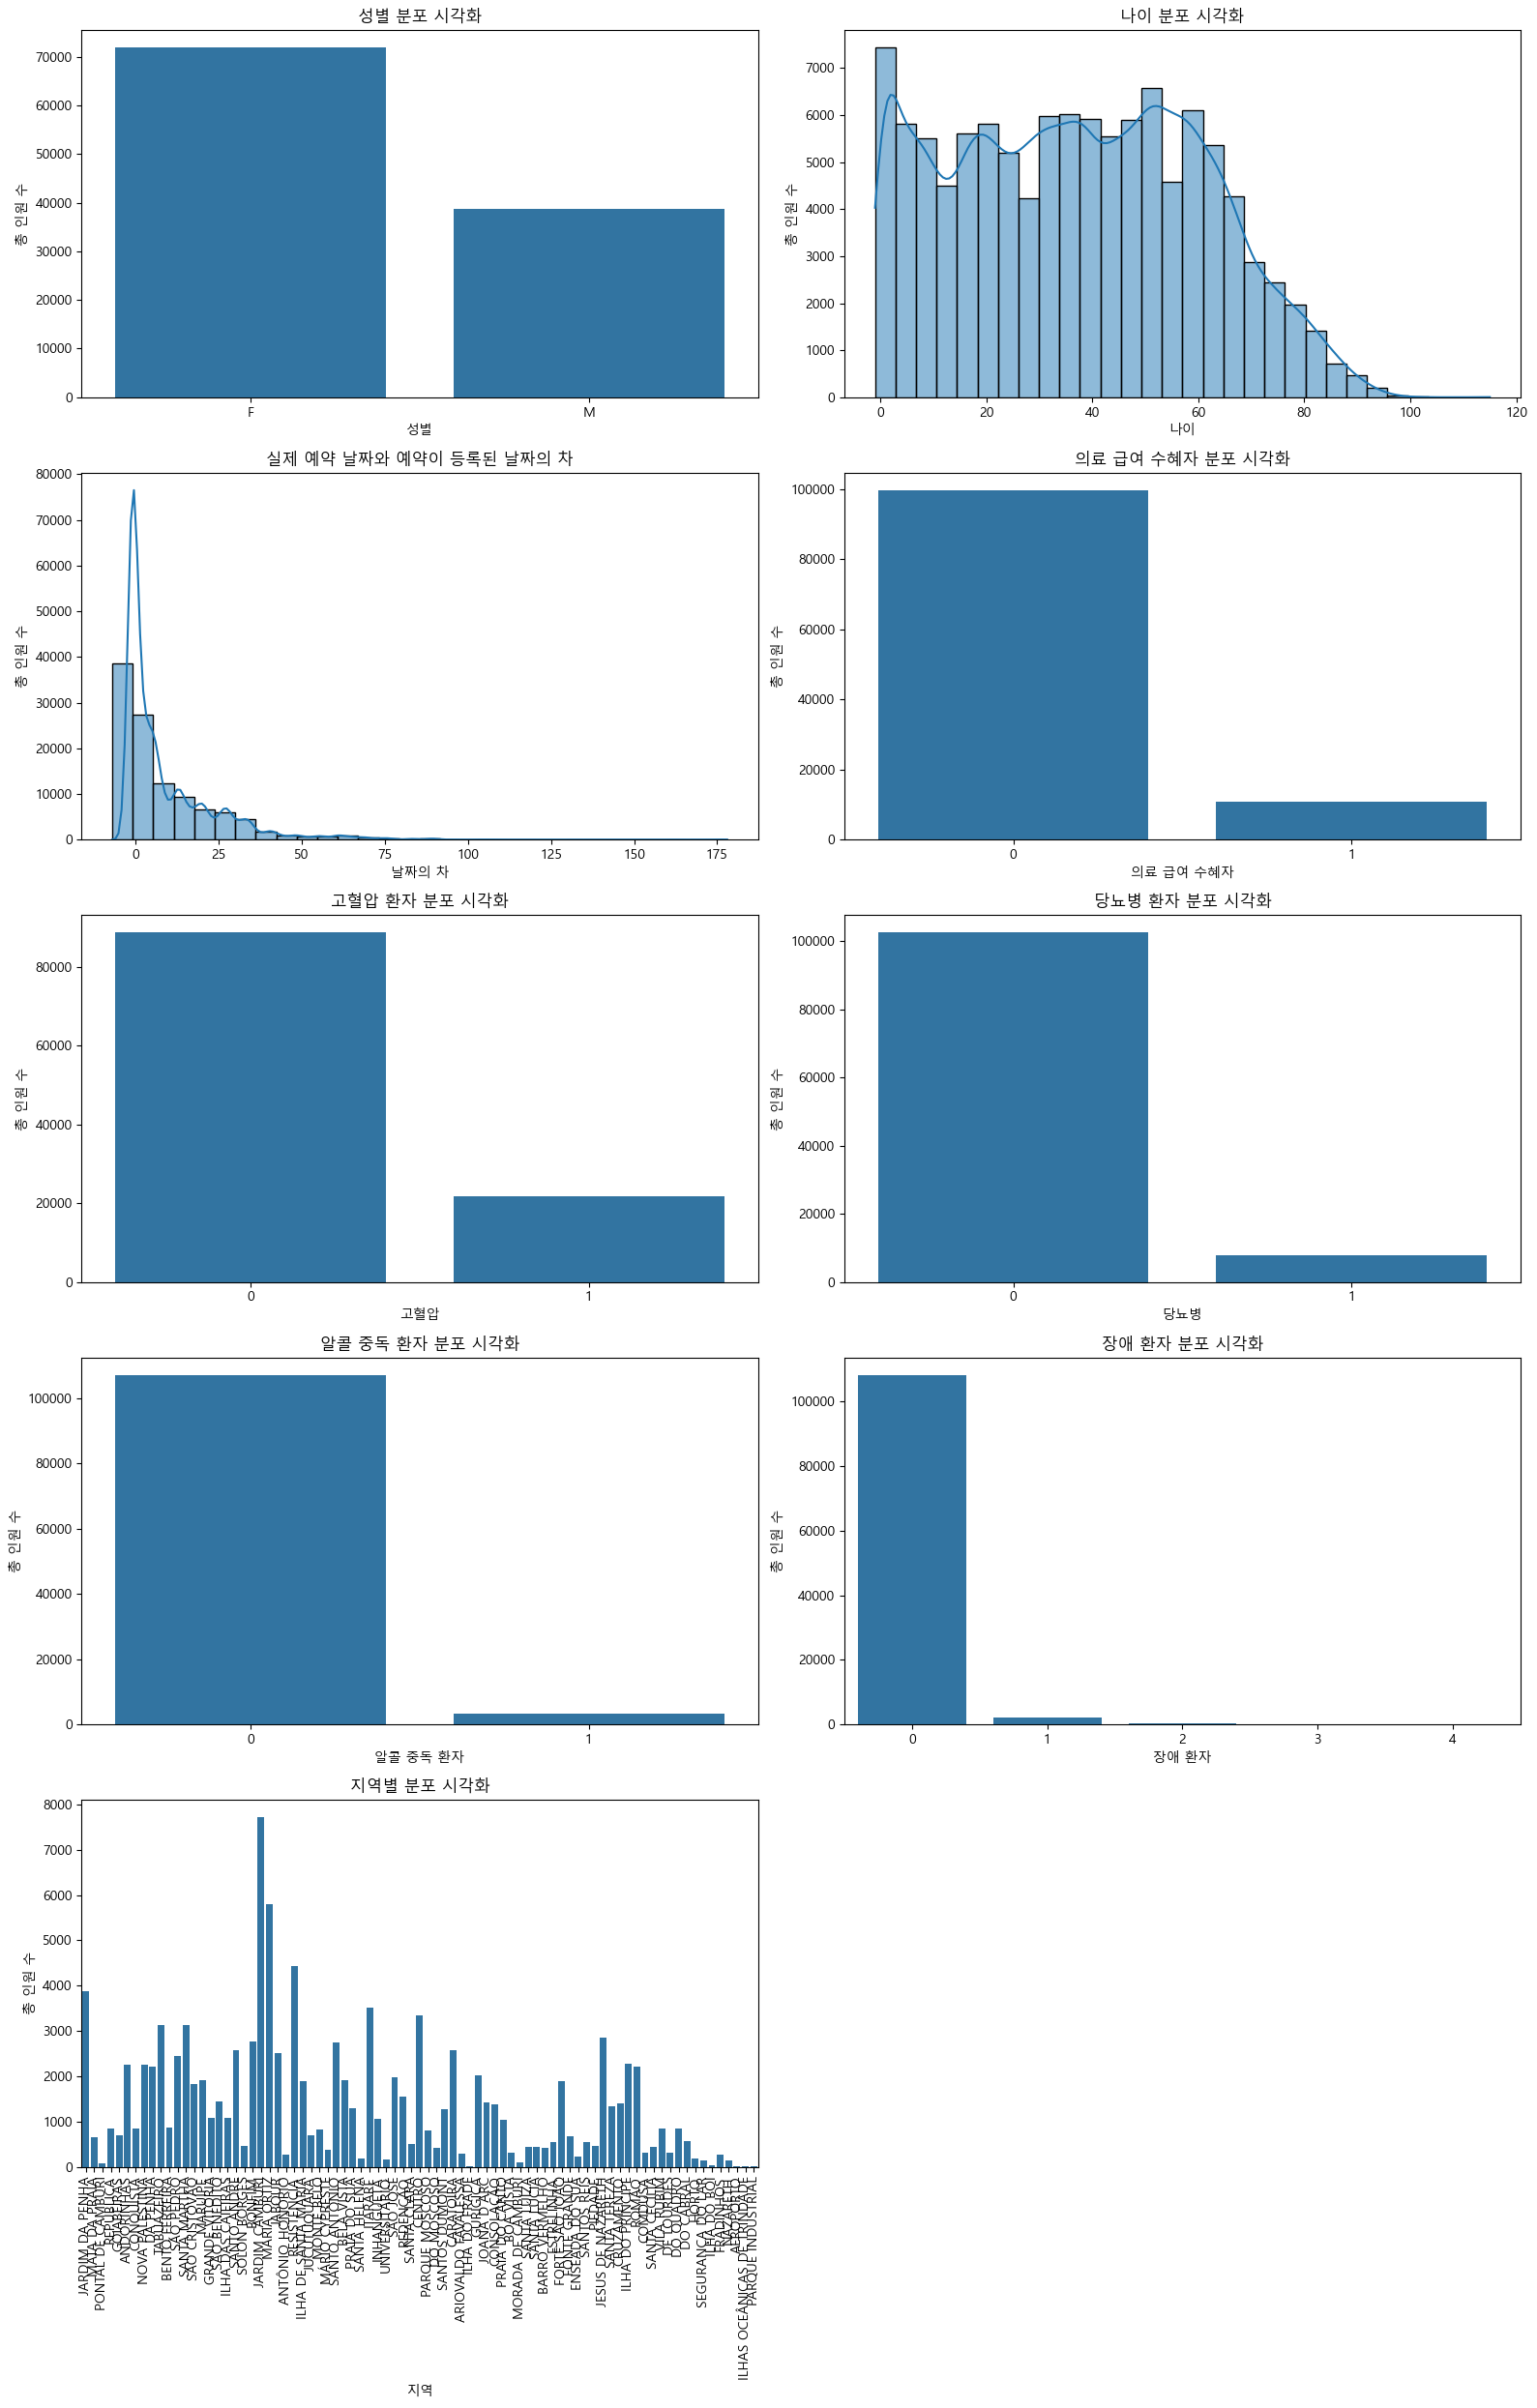

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 및 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
data = pd.read_csv("C:/Users/이보나/Desktop/의료데이터분석_20225494 이보나/KaggleV2-May-2016.csv")

# 데이터 변환
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'], errors='coerce')
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'], errors='coerce')
data['days_until_appointment'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

# 그래프 설정 (5행 2열로 변경)
fig, axes = plt.subplots(5, 2, figsize=(16, 25))  # 5행 2열로 설정

# 성별 분포
sns.countplot(x='Gender', data=data, ax=axes[0, 0])
axes[0, 0].set_title('성별 분포 시각화')
axes[0, 0].set_xlabel('성별')
axes[0, 0].set_ylabel('총 인원 수')

# 나이 분포
sns.histplot(data['Age'], kde=True, bins=30, ax=axes[0, 1])
axes[0, 1].set_title('나이 분포 시각화')
axes[0, 1].set_xlabel('나이')
axes[0, 1].set_ylabel('총 인원 수')

# 예약일과 실제 예약일의 차이
sns.histplot(data['days_until_appointment'], kde=True, bins=30, ax=axes[1, 0])
axes[1, 0].set_title('실제 예약 날짜와 예약이 등록된 날짜의 차')
axes[1, 0].set_xlabel('날짜의 차')
axes[1, 0].set_ylabel('총 인원 수')

# 의료 급여 수혜자
sns.countplot(x='Scholarship', data=data, ax=axes[1, 1])
axes[1, 1].set_title('의료 급여 수혜자 분포 시각화')
axes[1, 1].set_xlabel('의료 급여 수혜자')
axes[1, 1].set_ylabel('총 인원 수')

# 고혈압 환자
sns.countplot(x='Hipertension', data=data, ax=axes[2, 0])
axes[2, 0].set_title('고혈압 환자 분포 시각화')
axes[2, 0].set_xlabel('고혈압')
axes[2, 0].set_ylabel('총 인원 수')

# 당뇨병 환자
sns.countplot(x='Diabetes', data=data, ax=axes[2, 1])
axes[2, 1].set_title('당뇨병 환자 분포 시각화')
axes[2, 1].set_xlabel('당뇨병')
axes[2, 1].set_ylabel('총 인원 수')

# 알콜 중독 환자
sns.countplot(x='Alcoholism', data=data, ax=axes[3, 0])
axes[3, 0].set_title('알콜 중독 환자 분포 시각화')
axes[3, 0].set_xlabel('알콜 중독 환자')
axes[3, 0].set_ylabel('총 인원 수')

# 장애 환자
sns.countplot(x='Handcap', data=data, ax=axes[3, 1])
axes[3, 1].set_title('장애 환자 분포 시각화')
axes[3, 1].set_xlabel('장애 환자')
axes[3, 1].set_ylabel('총 인원 수')

# 지역
sns.countplot(x='Neighbourhood', data=data, ax=axes[4, 0])
axes[4, 0].set_title('지역별 분포 시각화')
axes[4, 0].set_xlabel('지역')
axes[4, 0].set_ylabel('총 인원 수')
axes[4, 0].tick_params(axis='x', rotation=90)  # X축 라벨 회전

# 비어 있는 마지막 칸
axes[4, 1].axis('off')

# 레이아웃 조정
plt.tight_layout()
plt.show()


In [2]:
# correlation

C:\TempFolder\ipykernel_13688\2904790888.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_vs_noshow = data.groupby('days_until_appointment_bin')['No-show'].mean().reset_index()
C:\TempFolder\ipykernel_13688\2904790888.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Scholarship', y='No-show', data=data, ci=None, ax=axes[1, 1])


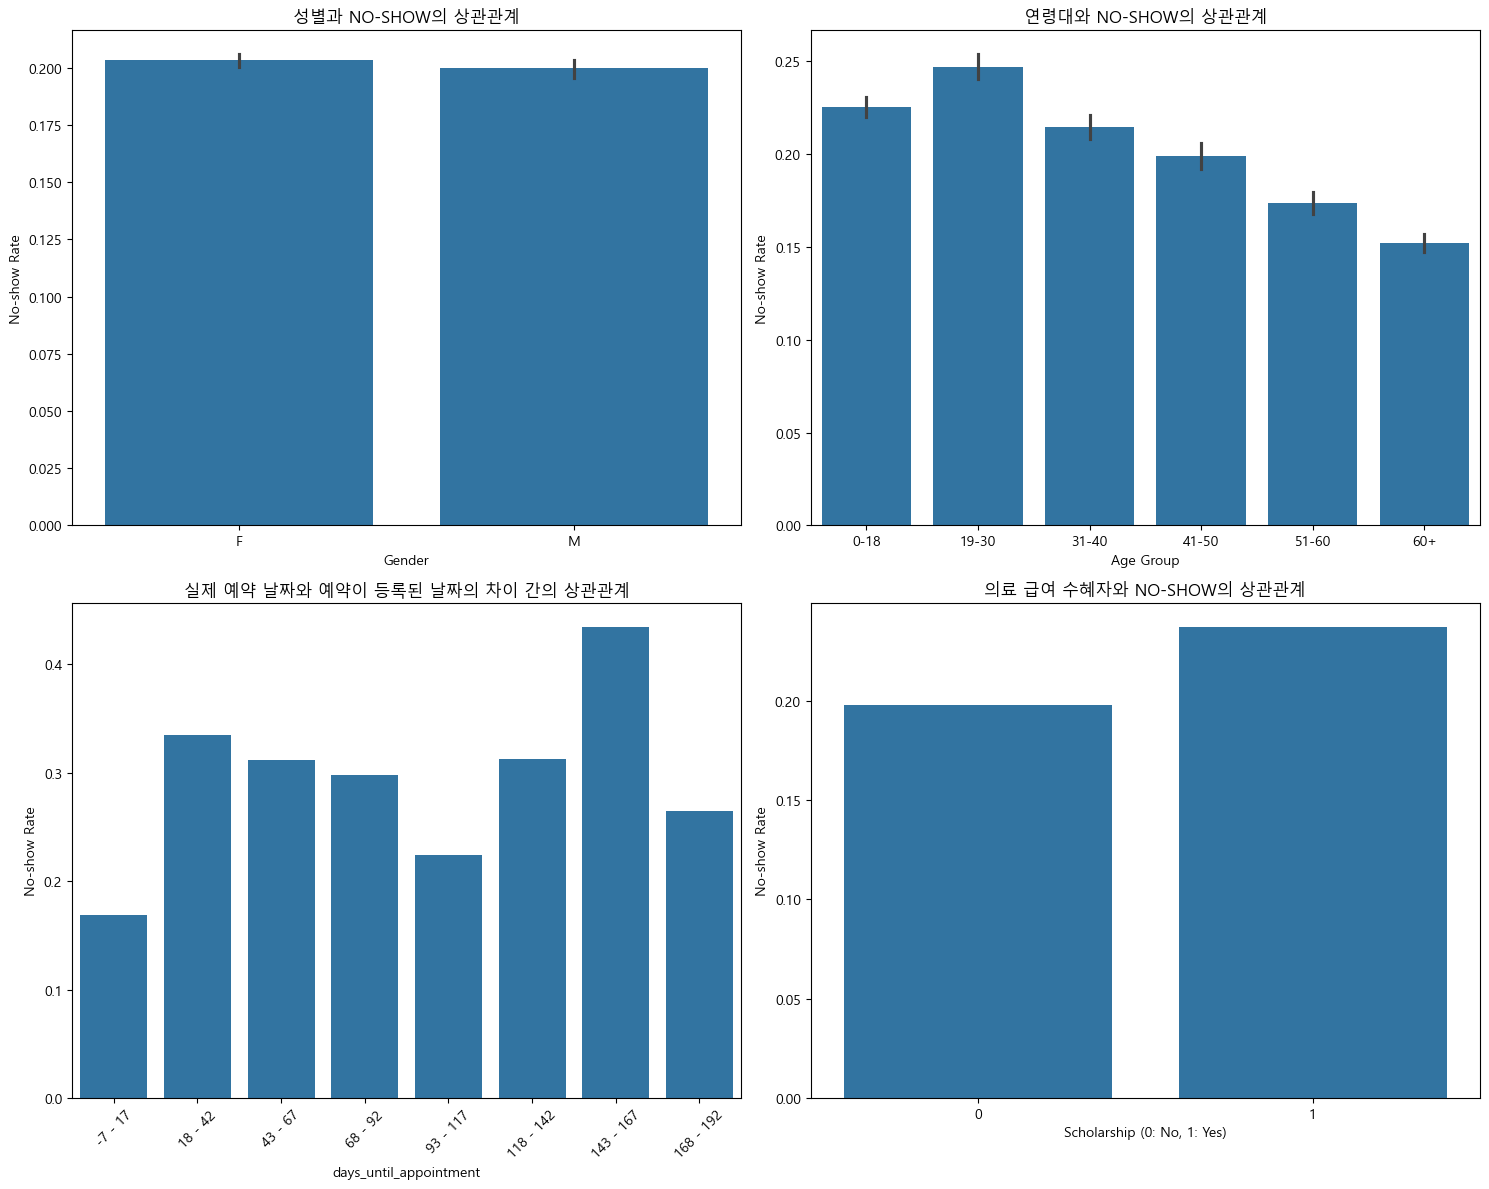

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
data = pd.read_csv("C:/Users/이보나/Desktop/의료데이터분석_20225494 이보나/KaggleV2-May-2016.csv")

# 'No-show' 열 변환: 'No'를 0으로, 'Yes'를 1로
data['No-show'] = data['No-show'].map({'No': 0, 'Yes': 1})

# 날짜 열 변환
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])

# 예약일과 실제 예약일의 차이 계산 (일 단위)
data['days_until_appointment'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

# 2x2 그래프 레이아웃 설정
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 성별과 No-show의 상관관계
sns.barplot(x='Gender', y='No-show', data=data, ax=axes[0, 0])
axes[0, 0].set_title('성별과 NO-SHOW의 상관관계')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('No-show Rate')

# 연령대와 No-show의 상관관계
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 18, 30, 40, 50, 60, 100], labels=['0-18', '19-30', '31-40', '41-50', '51-60', '60+'])
sns.barplot(x='AgeGroup', y='No-show', data=data, ax=axes[0, 1])
axes[0, 1].set_title('연령대와 NO-SHOW의 상관관계')
axes[0, 1].set_xlabel('Age Group')
axes[0, 1].set_ylabel('No-show Rate')

# 예약일과 실제 예약일의 차이 간의 상관관계 (구간별 No-show 비율)
bins = range(data['days_until_appointment'].min(), data['days_until_appointment'].max() + 25, 25)
labels = [f'{x} - {x+24}' for x in bins[:-1]]  # 구간 레이블 생성
data['days_until_appointment_bin'] = pd.cut(data['days_until_appointment'], bins=bins, labels=labels, right=False)
days_vs_noshow = data.groupby('days_until_appointment_bin')['No-show'].mean().reset_index()

sns.barplot(data=days_vs_noshow, x='days_until_appointment_bin', y='No-show', ax=axes[1, 0])
axes[1, 0].set_title('실제 예약 날짜와 예약이 등록된 날짜의 차이 간의 상관관계')
axes[1, 0].set_xlabel('days_until_appointment')
axes[1, 0].set_ylabel('No-show Rate')
axes[1, 0].tick_params(axis='x', rotation=45)  # X축 라벨 회전

# 의료 급여 수혜자와 No-show의 상관관계
sns.barplot(x='Scholarship', y='No-show', data=data, ci=None, ax=axes[1, 1])
axes[1, 1].set_title('의료 급여 수혜자와 NO-SHOW의 상관관계')
axes[1, 1].set_xlabel('Scholarship (0: No, 1: Yes)')
axes[1, 1].set_ylabel('No-show Rate')

# 레이아웃 조정
plt.tight_layout()
plt.show()


C:\TempFolder\ipykernel_13688\3365305236.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[0, 0], x='Hipertension', y='No-show', data=data, ci=None)
C:\TempFolder\ipykernel_13688\3365305236.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[0, 1], x='Diabetes', y='No-show', data=data, ci=None)
C:\TempFolder\ipykernel_13688\3365305236.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[1, 0], x='Alcoholism', y='No-show', data=data, ci=None)
C:\TempFolder\ipykernel_13688\3365305236.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[1, 1], x='SMS_received', y='No-show', data=data, ci=None)


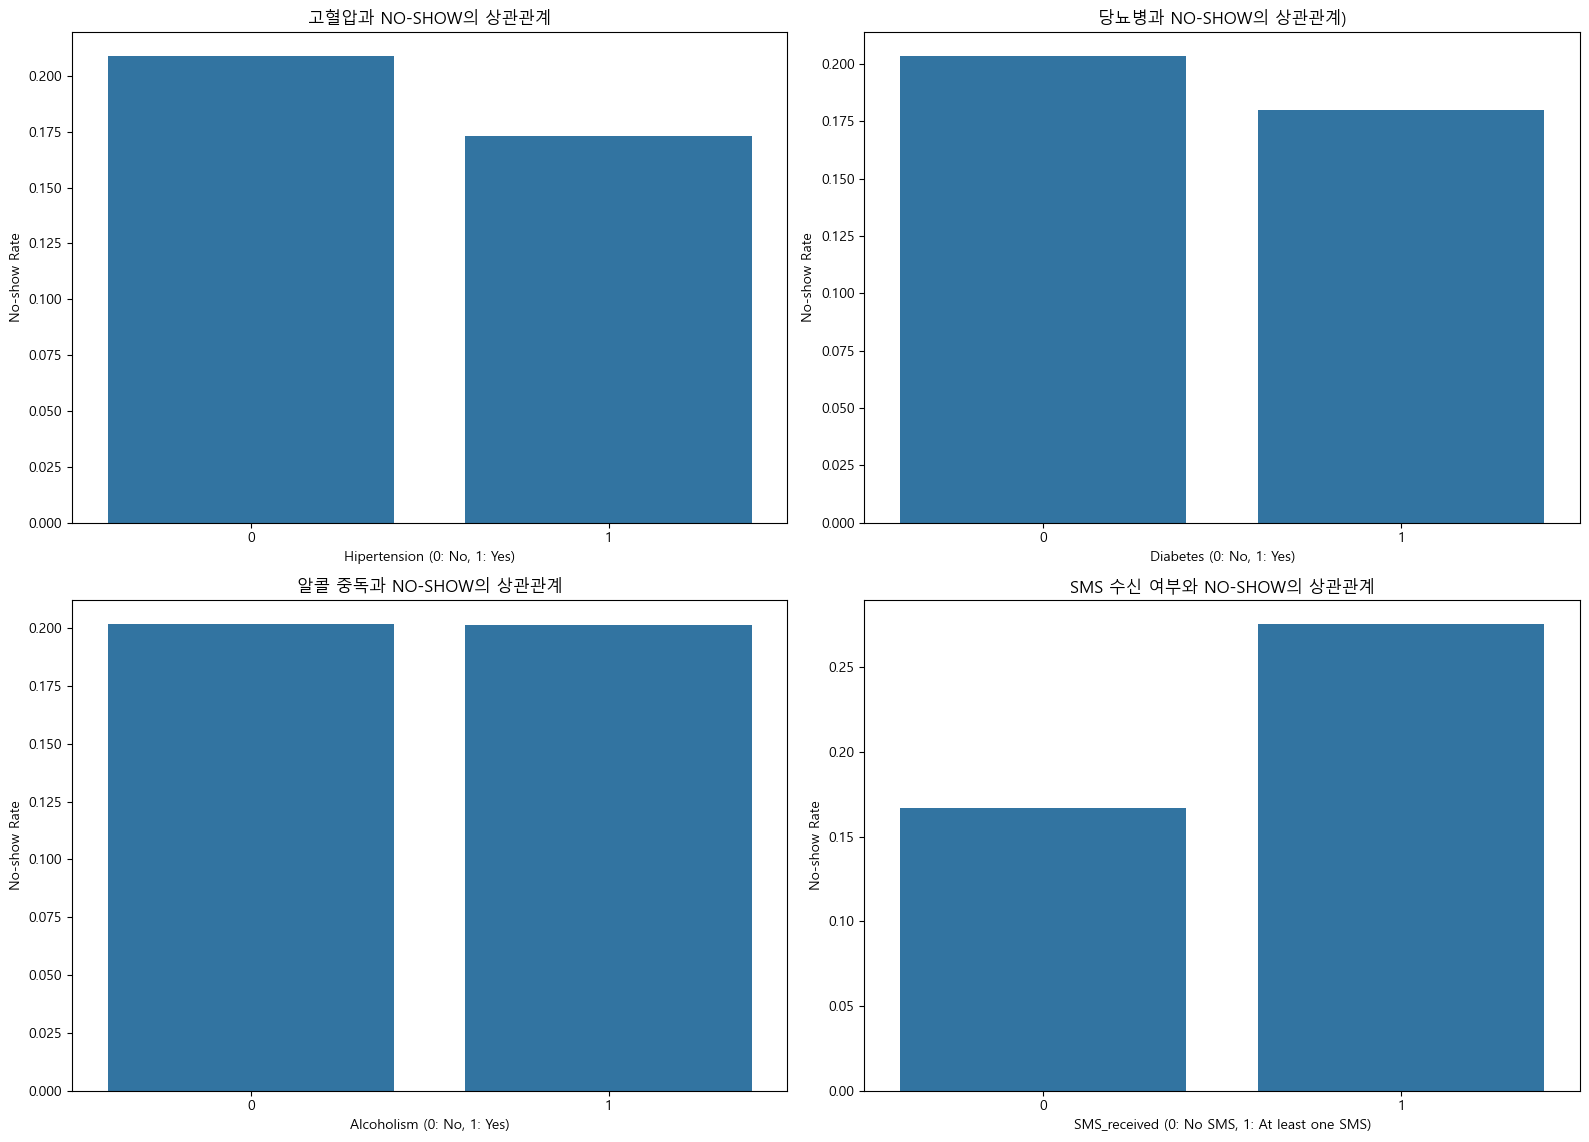

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 및 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
data = pd.read_csv("C:/Users/이보나/Desktop/의료데이터분석_20225494 이보나/KaggleV2-May-2016.csv")

# 'No-show' 열 변환: 'No'를 0으로, 'Yes'를 1로
data['No-show'] = data['No-show'].map({'No': 0, 'Yes': 1})

# Figure와 Axes 생성
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2x2 레이아웃

# 고혈압과 No-show 상관관계
correlation = data['Hipertension'].corr(data['No-show'])
sns.barplot(ax=axes[0, 0], x='Hipertension', y='No-show', data=data, ci=None)
axes[0, 0].set_title(f'고혈압과 NO-SHOW의 상관관계')
axes[0, 0].set_xlabel('Hipertension (0: No, 1: Yes)')
axes[0, 0].set_ylabel('No-show Rate')

# 당뇨병과 No-show 상관관계
correlation_diabetes = data['Diabetes'].corr(data['No-show'])
sns.barplot(ax=axes[0, 1], x='Diabetes', y='No-show', data=data, ci=None)
axes[0, 1].set_title(f'당뇨병과 NO-SHOW의 상관관계)')
axes[0, 1].set_xlabel('Diabetes (0: No, 1: Yes)')
axes[0, 1].set_ylabel('No-show Rate')

# 알콜 중독과 No-show 상관관계
correlation_alcoholism = data['Alcoholism'].corr(data['No-show'])
sns.barplot(ax=axes[1, 0], x='Alcoholism', y='No-show', data=data, ci=None)
axes[1, 0].set_title(f'알콜 중독과 NO-SHOW의 상관관계')
axes[1, 0].set_xlabel('Alcoholism (0: No, 1: Yes)')
axes[1, 0].set_ylabel('No-show Rate')

# SMS 수신 여부와 No-show 상관관계
correlation_sms = data['SMS_received'].corr(data['No-show'])
sns.barplot(ax=axes[1, 1], x='SMS_received', y='No-show', data=data, ci=None)
axes[1, 1].set_title(f'SMS 수신 여부와 NO-SHOW의 상관관계')
axes[1, 1].set_xlabel('SMS_received (0: No SMS, 1: At least one SMS)')
axes[1, 1].set_ylabel('No-show Rate')

# 그래프 간 간격 조정
plt.tight_layout(rect=[0, 0, 1, 0.96])  # 제목 공간 확보
plt.show()


In [5]:
# modeling

In [6]:
#  SMS 수신을 안 받은 사람

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 및 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
data = pd.read_csv("C:/Users/이보나/Desktop/의료데이터분석_20225494 이보나/KaggleV2-May-2016.csv")

# 데이터 변환
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'], errors='coerce')
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'], errors='coerce')
data['days_until_appointment'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

# 필터링: 조건에 맞는 데이터 선택
filtered_data = data[
    
    (data['SMS_received'] == 0) 
    
]

# 특성과 라벨 분리 (SMS_received 및 days_until_appointment 포함)
X = filtered_data[['Age', 'days_until_appointment', 'Hipertension', 'Diabetes', 'SMS_received']]
y = filtered_data['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)  # 노쇼 여부: Yes -> 1, No -> 0

# 교차 검증 설정
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

# 교차 검증 수행
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(f"교차 검증 정확도 점수: {cv_scores}")
print(f"평균 교차 검증 정확도: {cv_scores.mean():.2f}")

# 최종 모델 학습 및 평가
model.fit(X, y)

# 예측 수행
y_pred = model.predict(X)

# 평가 지표 출력
print("Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:")
print(classification_report(y, y_pred))


교차 검증 정확도 점수: [0.8207742  0.81357852 0.82210674 0.81351189 0.81291225]
평균 교차 검증 정확도: 0.82
Accuracy: 0.8622959557598774

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     62510
           1       0.72      0.29      0.41     12535

    accuracy                           0.86     75045
   macro avg       0.80      0.63      0.67     75045
weighted avg       0.85      0.86      0.84     75045



In [7]:
#  SMS 수신을 받은 사람

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 및 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
data = pd.read_csv("C:/Users/이보나/Desktop/의료데이터분석_20225494 이보나/KaggleV2-May-2016.csv")

# 데이터 변환
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'], errors='coerce')
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'], errors='coerce')
data['days_until_appointment'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

# 필터링: 조건에 맞는 데이터 선택
filtered_data = data[
    
    (data['SMS_received'] == 1) 
    
]

# 특성과 라벨 분리 (SMS_received 및 days_until_appointment 포함)
X = filtered_data[['Age', 'days_until_appointment', 'Hipertension', 'Diabetes', 'SMS_received']]
y = filtered_data['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)  # 노쇼 여부: Yes -> 1, No -> 0

# 교차 검증 설정
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

# 교차 검증 수행
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(f"교차 검증 정확도 점수: {cv_scores}")
print(f"평균 교차 검증 정확도: {cv_scores.mean():.2f}")

# 최종 모델 학습 및 평가
model.fit(X, y)

# 예측 수행
y_pred = model.predict(X)

# 평가 지표 출력
print("Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:")
print(classification_report(y, y_pred))


교차 검증 정확도 점수: [0.68423277 0.6728195  0.68869786 0.67474634 0.68418828]
평균 교차 검증 정확도: 0.68
Accuracy: 0.7694042049489882

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.96      0.86     25698
           1       0.71      0.28      0.40      9784

    accuracy                           0.77     35482
   macro avg       0.74      0.62      0.63     35482
weighted avg       0.76      0.77      0.73     35482



In [8]:

# 20-60세의 남성, 의료 급여 미수혜자, 고혈압과 당뇨 환자, 알콜 중독과 장애가 아닌 사람 중 SMS 수신을 안 받은 사람
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 및 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
data = pd.read_csv("C:/Users/이보나/Desktop/의료데이터분석_20225494 이보나/KaggleV2-May-2016.csv")

# 데이터 변환
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'], errors='coerce')
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'], errors='coerce')
data['days_until_appointment'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

# 필터링: 조건에 맞는 데이터 선택 (SMS를 받은 사람만 포함)
filtered_data = data[
    (data['Gender'] == 'M') &  # 남성
    (data['Age'] >= 20) & (data['Age'] <= 60) &  # 나이 조건
    (data['Scholarship'] == 0) &  # 의료 급여 수혜 여부
    (data['Hipertension'] == 1) &  # 고혈압
    (data['Diabetes'] == 1) &  # 당뇨
    (data['Alcoholism'] == 0) &  # 알코올 중독 아님
    (data['Handcap'] == 0) &  # 장애 아님
    (data['SMS_received'] == 0)  # SMS를 안 받은 사람
]

# 특성과 라벨 분리 
X = filtered_data[['Age', 'days_until_appointment', 'Hipertension', 'Diabetes', 'SMS_received']]
y = filtered_data['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)  # 노쇼 여부: Yes -> 1, No -> 0

# 교차 검증 설정
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

# 교차 검증 수행
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(f"교차 검증 정확도 점수: {cv_scores}")
print(f"평균 교차 검증 정확도: {cv_scores.mean():.2f}")

# 최종 모델 학습 및 평가
model.fit(X, y)

# 예측 수행
y_pred = model.predict(X)

# 평가 지표 출력
print("Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:")
print(classification_report(y, y_pred))


교차 검증 정확도 점수: [0.7625     0.7375     0.79746835 0.79746835 0.73417722]
평균 교차 검증 정확도: 0.77
Accuracy: 0.9219143576826196

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       331
           1       0.93      0.58      0.71        66

    accuracy                           0.92       397
   macro avg       0.92      0.78      0.83       397
weighted avg       0.92      0.92      0.91       397



In [9]:

# 20-60세의 남성, 의료 급여 미수혜자, 고혈압과 당뇨 환자, 알콜 중독과 장애가 아닌 사람 중 SMS 수신을 받은 사람
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 및 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
data = pd.read_csv("C:/Users/이보나/Desktop/의료데이터분석_20225494 이보나/KaggleV2-May-2016.csv")

# 데이터 변환
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'], errors='coerce')
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'], errors='coerce')
data['days_until_appointment'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

# 필터링: 조건에 맞는 데이터 선택 (SMS를 받은 사람만 포함)
filtered_data = data[
    (data['Gender'] == 'M') &  # 남성
    (data['Age'] >= 20) & (data['Age'] <= 60) &  # 나이 조건
    (data['Scholarship'] == 0) &  # 의료 급여 수혜 여부
    (data['Hipertension'] == 1) &  # 고혈압
    (data['Diabetes'] == 1) &  # 당뇨
    (data['Alcoholism'] == 0) &  # 알코올 중독 아님
    (data['Handcap'] == 0) &  # 장애 아님
    (data['SMS_received'] == 1)  # SMS를 받은 사람
]

# 특성과 라벨 분리 
X = filtered_data[['Age', 'days_until_appointment', 'Hipertension', 'Diabetes', 'SMS_received']]
y = filtered_data['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)  # 노쇼 여부: Yes -> 1, No -> 0

# 교차 검증 설정
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

# 교차 검증 수행
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(f"교차 검증 정확도 점수: {cv_scores}")
print(f"평균 교차 검증 정확도: {cv_scores.mean():.2f}")

# 최종 모델 학습 및 평가
model.fit(X, y)

# 예측 수행
y_pred = model.predict(X)

# 평가 지표 출력
print("Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:")
print(classification_report(y, y_pred))


교차 검증 정확도 점수: [0.76470588 0.64705882 0.70588235 0.76470588 0.70588235]
평균 교차 검증 정확도: 0.72
Accuracy: 0.9764705882352941

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       136
           1       1.00      0.88      0.94        34

    accuracy                           0.98       170
   macro avg       0.99      0.94      0.96       170
weighted avg       0.98      0.98      0.98       170



In [10]:
# 20-60세의 여성, 의료 급여 수혜자, 고혈압과 당뇨 환자, 알콜 중독과 장애가 아닌 사람 중 SMS 수신을 안 받은 사람

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 및 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
data = pd.read_csv("C:/Users/이보나/Desktop/의료데이터분석_20225494 이보나/KaggleV2-May-2016.csv")

# 데이터 변환
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'], errors='coerce')
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'], errors='coerce')
data['days_until_appointment'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

# 필터링: 조건에 맞는 데이터 선택
filtered_data = data[
    (data['Gender'] == 'F') &  # 여성
    (data['Age'] >= 20) & (data['Age'] <= 60) &  # 나이 조건
    (data['Scholarship'] == 1) &  # 의료 급여 수혜 여부
    (data['Hipertension'] == 1) &  # 고혈압
    (data['Diabetes'] == 1) &  # 당뇨
    (data['Alcoholism'] == 0) &  # 알코올 중독 아님
    (data['Handcap'] == 0) &  # 장애 아님
    (data['SMS_received'] == 0) 
]

# 특성과 라벨 분리 (SMS_received 및 days_until_appointment 포함)
X = filtered_data[['Age', 'days_until_appointment', 'Hipertension', 'Diabetes', 'SMS_received']]
y = filtered_data['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)  # 노쇼 여부: Yes -> 1, No -> 0

# 교차 검증 설정
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

# 교차 검증 수행
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(f"교차 검증 정확도 점수: {cv_scores}")
print(f"평균 교차 검증 정확도: {cv_scores.mean():.2f}")

# 최종 모델 학습 및 평가
model.fit(X, y)

# 예측 수행
y_pred = model.predict(X)

# 평가 지표 출력
print("Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:")
print(classification_report(y, y_pred))



교차 검증 정확도 점수: [0.77142857 0.77142857 0.85714286 0.79411765 0.91176471]
평균 교차 검증 정확도: 0.82
Accuracy: 0.9595375722543352

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       145
           1       0.92      0.82      0.87        28

    accuracy                           0.96       173
   macro avg       0.94      0.90      0.92       173
weighted avg       0.96      0.96      0.96       173



In [11]:
# 20-60세의 여성, 의료 급여 수혜자, 고혈압과 당뇨 환자, 알콜 중독과 장애가 아닌 사람 중 SMS 수신을 받은 사람

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 및 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
data = pd.read_csv("C:/Users/이보나/Desktop/의료데이터분석_20225494 이보나/KaggleV2-May-2016.csv")

# 데이터 변환
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'], errors='coerce')
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'], errors='coerce')
data['days_until_appointment'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

# 필터링: 조건에 맞는 데이터 선택
filtered_data = data[
    (data['Gender'] == 'F') &  # 여성
    (data['Age'] >= 20) & (data['Age'] <= 60) &  # 나이 조건
    (data['Scholarship'] == 1) &  # 의료 급여 수혜 여부
    (data['Hipertension'] == 1) &  # 고혈압
    (data['Diabetes'] == 1) &  # 당뇨
    (data['Alcoholism'] == 0) &  # 알코올 중독 아님
    (data['Handcap'] == 0) &  # 장애 아님
    (data['SMS_received'] == 1) 
    
]

# 특성과 라벨 분리 (SMS_received 및 days_until_appointment 포함)
X = filtered_data[['Age', 'days_until_appointment', 'Hipertension', 'Diabetes', 'SMS_received']]
y = filtered_data['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)  # 노쇼 여부: Yes -> 1, No -> 0

# 교차 검증 설정
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

# 교차 검증 수행
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(f"교차 검증 정확도 점수: {cv_scores}")
print(f"평균 교차 검증 정확도: {cv_scores.mean():.2f}")

# 최종 모델 학습 및 평가
model.fit(X, y)

# 예측 수행
y_pred = model.predict(X)

# 평가 지표 출력
print("Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:")
print(classification_report(y, y_pred))


교차 검증 정확도 점수: [0.76470588 0.70588235 0.70588235 0.52941176 0.625     ]
평균 교차 검증 정확도: 0.67
Accuracy: 0.9880952380952381

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.96      0.98        26

    accuracy                           0.99        84
   macro avg       0.99      0.98      0.99        84
weighted avg       0.99      0.99      0.99        84



In [12]:
#  ILHA DAS CAIEIRAS 지역에 사는 사람들 중 SMS 수신을 안 받은 사람

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 및 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
data = pd.read_csv("C:/Users/이보나/Desktop/의료데이터분석_20225494 이보나/KaggleV2-May-2016.csv")

# 데이터 변환
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'], errors='coerce')
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'], errors='coerce')
data['days_until_appointment'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

# 필터링: 조건에 맞는 데이터 선택
filtered_data = data[
    
    (data['SMS_received'] == 0) &
    (data['Neighbourhood'] == 'ILHA DAS CAIEIRAS')  
    
]

# 특성과 라벨 분리 (SMS_received 및 days_until_appointment 포함)
X = filtered_data[['Age', 'days_until_appointment', 'Hipertension', 'Diabetes', 'SMS_received']]
y = filtered_data['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)  # 노쇼 여부: Yes -> 1, No -> 0

# 교차 검증 설정
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

# 교차 검증 수행
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(f"교차 검증 정확도 점수: {cv_scores}")
print(f"평균 교차 검증 정확도: {cv_scores.mean():.2f}")

# 최종 모델 학습 및 평가
model.fit(X, y)

# 예측 수행
y_pred = model.predict(X)

# 평가 지표 출력
print("Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:")
print(classification_report(y, y_pred))


교차 검증 정확도 점수: [0.76870748 0.78911565 0.76190476 0.70547945 0.78082192]
평균 교차 검증 정확도: 0.76
Accuracy: 0.9140518417462483

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       595
           1       0.93      0.59      0.72       138

    accuracy                           0.91       733
   macro avg       0.92      0.79      0.83       733
weighted avg       0.92      0.91      0.91       733



In [13]:
#  ILHA DAS CAIEIRAS 지역에 사는 사람들 중 SMS 수신을 안 받은 사람

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 및 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
data = pd.read_csv("C:/Users/이보나/Desktop/의료데이터분석_20225494 이보나/KaggleV2-May-2016.csv")

# 데이터 변환
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'], errors='coerce')
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'], errors='coerce')
data['days_until_appointment'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

# 필터링: 조건에 맞는 데이터 선택
filtered_data = data[
    
    (data['SMS_received'] == 1) &
    (data['Neighbourhood'] == 'ILHA DAS CAIEIRAS')  
    
]

# 특성과 라벨 분리 (SMS_received 및 days_until_appointment 포함)
X = filtered_data[['Age', 'days_until_appointment', 'Hipertension', 'Diabetes', 'SMS_received']]
y = filtered_data['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)  # 노쇼 여부: Yes -> 1, No -> 0

# 교차 검증 설정
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

# 교차 검증 수행
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(f"교차 검증 정확도 점수: {cv_scores}")
print(f"평균 교차 검증 정확도: {cv_scores.mean():.2f}")

# 최종 모델 학습 및 평가
model.fit(X, y)

# 예측 수행
y_pred = model.predict(X)

# 평가 지표 출력
print("Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:")
print(classification_report(y, y_pred))


교차 검증 정확도 점수: [0.61764706 0.70588235 0.63235294 0.65671642 0.58208955]
평균 교차 검증 정확도: 0.64
Accuracy: 0.9289940828402367

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       241
           1       0.92      0.82      0.87        97

    accuracy                           0.93       338
   macro avg       0.93      0.90      0.91       338
weighted avg       0.93      0.93      0.93       338

